# Decision Tree Revision Notebook

#### Name : Jack McNally 
#### Student Number : C00228758 
#### Lecturer : Greg Doyle 

## Contents

* [Problem](#Problem)
* [Data Pre-processing](#Datapre)
* [Main Algorithm](#MainAl)
* [Conclusion](#Con)

### Problem  <a class="anchor" id="Problem"></a>

<font color= light-gray>
    
In this notebook I will demonstrate the Decision Tree algorithm using the CART algorithm. The CART Algorithm or (Classification and Regression Trees) is a decision algorithm that produces decision trees based on the give criteria.  

In this example the primary focus will be on Loan Approval rates. I will first combine both data-sets and then train a model to get the highest accuracy as possible.

I will then show the model being used with "Entropy" and "Gini impurty" these are both methods used to increase the accuracy of the decision tree algorithm.

Firstly I will begin by undertaking Data Pre-processing, the idea of pre-processing is to get the data in shape to preform the algorithm. I will take through each of the step and explain why each step is necessary to preform the algorithm.

Next I will move onto the actual implementation of the algorithm by first training the model and showing the initial accuracy and then improving the accuracy by using "Entropy" and "Gini Impurity".

Lastly I will conclude the revision tutorial by assessing the quality of the algorithms and the accuracy and finally explain where else this algorithm can be used and also when to use the Decision algorithm

</font>

### Data Pre-processing  <a class="anchor" id="Datapre"></a>

<font color = light-gray> 
The first step in the Data pre-processing stage is import the important imports as well as the Dataset. In this case I am using two datasets that I will combine together.
</font>

In [3]:
import numpy as np
import pandas as pd
import os
from sklearn import tree
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data1 = pd.read_csv('/home/jack/DataSolo/DecisionTree/test.csv')

In [5]:
data1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [6]:
data2 = pd.read_csv('/home/jack/DataSolo/DecisionTree/train.csv')

In [7]:
data2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


<font color = light-gray> 
The variables Data1 & Data2 hold the datasets that will be combined together.
</font>

In [8]:
data = [data1, data2]

In [9]:
combine = pd.DataFrame()

In [10]:
combine = pd.concat(data, sort=True)

In [11]:
combine.to_csv('/home/jack/DataSolo/DecisionTree/combine.csv', index=False)

In [12]:
LoanApproval = pd.read_csv('/home/jack/DataSolo/DecisionTree/combine.csv')

In [13]:
test = LoanApproval

In [14]:
test = pd.DataFrame(LoanApproval, columns=['Loan_ID'])

In [15]:
dupTest = test[test.duplicated(['Loan_ID'])]

In [16]:
LoanApproval

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
0,5720,0.0,1.0,0,Graduate,Male,110.0,360.0,LP001015,NaN,Yes,Urban,No
1,3076,1500.0,1.0,1,Graduate,Male,126.0,360.0,LP001022,NaN,Yes,Urban,No
2,5000,1800.0,1.0,2,Graduate,Male,208.0,360.0,LP001031,NaN,Yes,Urban,No
3,2340,2546.0,NaN,2,Graduate,Male,100.0,360.0,LP001035,NaN,Yes,Urban,No
4,3276,0.0,1.0,0,Not Graduate,Male,78.0,360.0,LP001051,NaN,No,Urban,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,2900,0.0,1.0,0,Graduate,Female,71.0,360.0,LP002978,Y,No,Rural,No
977,4106,0.0,1.0,3+,Graduate,Male,40.0,180.0,LP002979,Y,Yes,Rural,No
978,8072,240.0,1.0,1,Graduate,Male,253.0,360.0,LP002983,Y,Yes,Urban,No
979,7583,0.0,1.0,2,Graduate,Male,187.0,360.0,LP002984,Y,Yes,Urban,No


### Main Algorithm  <a class="anchor" id="MainAl"></a>

<font color = light-gray> 
This section is the main section of the revision, in this section I will demonstrate how to train the model and then how to tune the model to get the best accuracy as possible.
</font>

In [17]:
cols = ['Loan_ID','Gender', 'Married','Dependents', 'Education', 'Self_Employed', 'ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History', 'Property_Area','Loan_Status']

In [18]:
LoanApproval = pd.read_csv('/home/jack/DataSolo/DecisionTree/FinalDT.csv', header=None, names=cols)

In [19]:
LoanApproval

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
2,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
3,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
4,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
611,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
612,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
613,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [20]:
features = ['Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Credit_History']

In [21]:
x = LoanApproval[features]

In [22]:
y = LoanApproval.Loan_Status

<font color = light-gray> 
The sections below display converting or mapping the string values to binary values, this is a very important step and is explain in more detail in the report documentation.
</font>

In [23]:
LoanApproval['Gender'] = LoanApproval['Gender'].map(dict(Male=1,Female=0))

In [24]:
LoanApproval = LoanApproval.drop(0)

In [25]:
LoanApproval['Married'] = LoanApproval['Married'].map(dict(Yes=1,No=0))

In [26]:
LoanApproval['Education'] = LoanApproval['Education'].eq('Graduate').mul(1.0)

In [27]:
LoanApproval['Self_Employed'] = LoanApproval['Self_Employed'].eq('Yes').mul(1.0)

In [28]:
LoanApproval['Property_Area'] = LoanApproval['Property_Area'].map(dict(Urban=1,Rural=0,Semiurban=2))

In [29]:
LoanApproval['Dependents'] = LoanApproval['Dependents'].eq('3+').mul(3.0)

In [30]:
features = ['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']
x = LoanApproval[features]
y = LoanApproval.Loan_Status
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=1)

In [31]:
Safe = LoanApproval

In [32]:
LoanApproval = Safe

In [33]:
LoanApproval.fillna(0)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001002,1.0,0.0,0.0,1.0,0.0,5849,0.0,0,360.0,1.0,1,Y
2,LP001003,1.0,1.0,0.0,1.0,0.0,4583,1508.0,128.0,360.0,1.0,0,N
3,LP001005,1.0,1.0,0.0,1.0,1.0,3000,0.0,66.0,360.0,1.0,1,Y
4,LP001006,1.0,1.0,0.0,0.0,0.0,2583,2358.0,120.0,360.0,1.0,1,Y
5,LP001008,1.0,0.0,0.0,1.0,0.0,6000,0.0,141.0,360.0,1.0,1,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,LP002978,0.0,0.0,0.0,1.0,0.0,2900,0.0,71.0,360.0,1.0,0,Y
611,LP002979,1.0,1.0,3.0,1.0,0.0,4106,0.0,40.0,180.0,1.0,0,Y
612,LP002983,1.0,1.0,0.0,1.0,0.0,8072,240.0,253.0,360.0,1.0,1,Y
613,LP002984,1.0,1.0,0.0,1.0,0.0,7583,0.0,187.0,360.0,1.0,1,Y


In [34]:
LoanApproval = LoanApproval.replace(np.nan,0)

<font color = light-gray> 
This section demonstrates train the model using test_train_split. This function takes in a series of parameters and divides the dataset randomly. 
</font>

In [35]:
features = ['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']
x = LoanApproval[features]
y = LoanApproval.Loan_Status
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=1)

<font color = light-gray> 
The following lines of code show the first decision tree, the DecisionTreeClassifier() function takes a series of parameter and these parameters can be tuned to make the accuracy of the decision tree higher. For this example I only set the max_depth, also a quick note that the Decision Tree Classifier function also uses much more parameters as default and that list can be found here: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
</font>

In [112]:
cl = DecisionTreeClassifier(max_depth=3, criterion=)
cl = cl.fit(x_train,y_train)
y_pred = cl.predict(x_test)

In [113]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.772972972972973


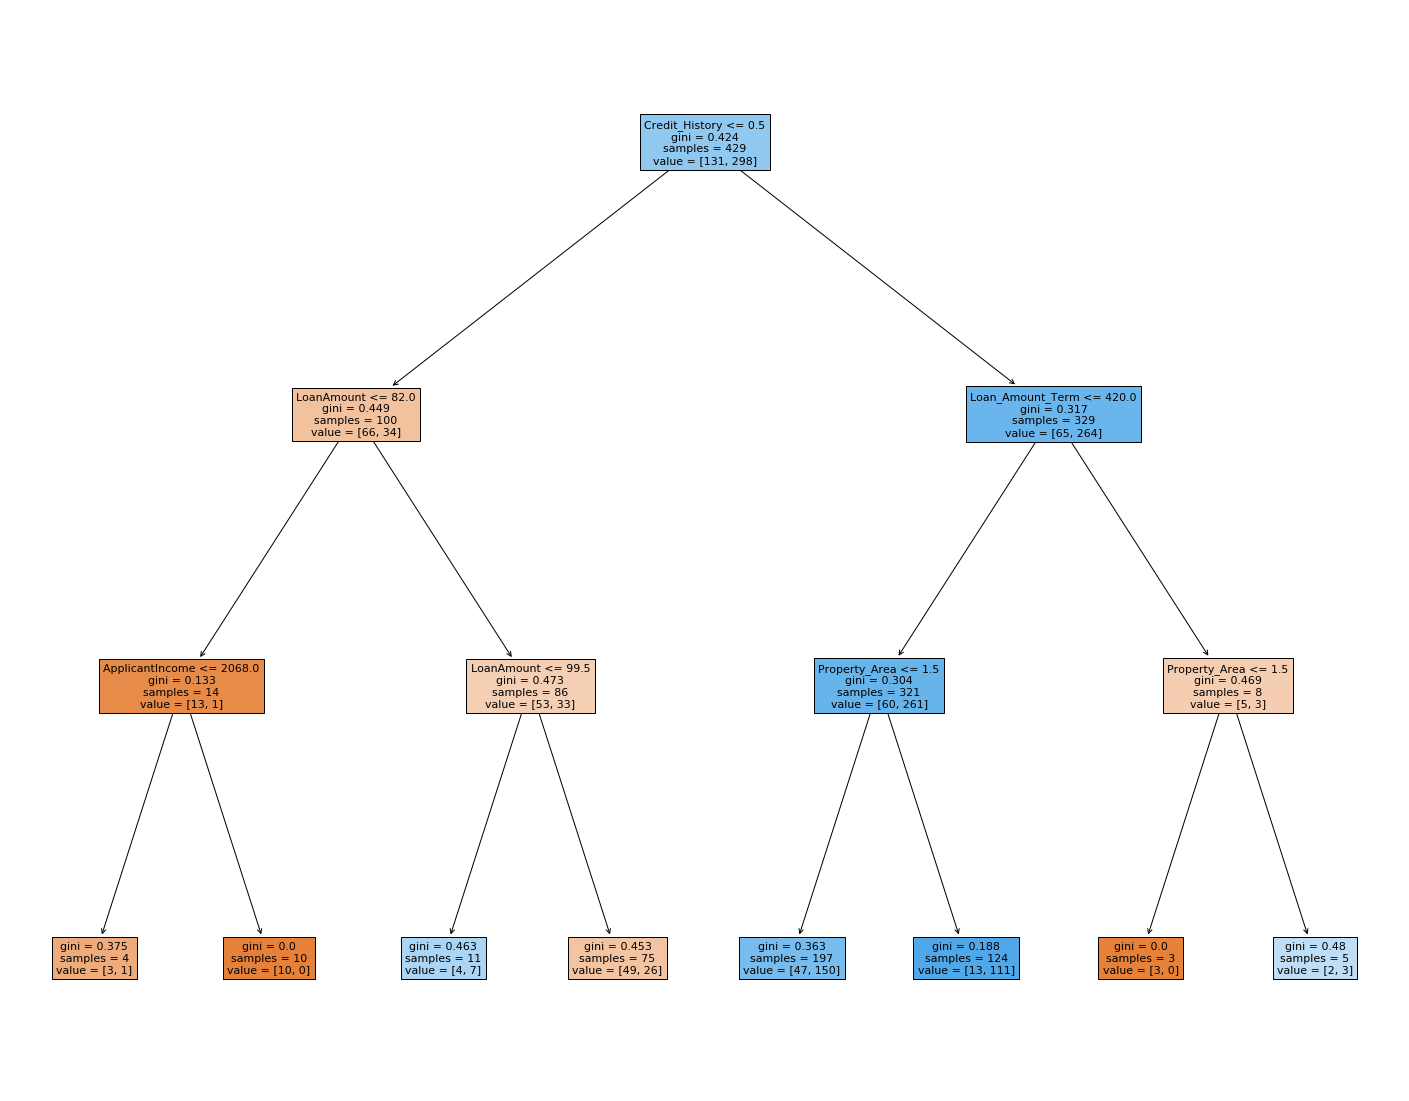

In [38]:

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(cl, 
                   feature_names=features,  
                   
                   filled=True)

<font color = light-gray> 
In this Decision tree i have slightly tuned the Decision tree more, I have set the criterion to "Entropy". There is 2 different criterions for Decision Trees; Entropy and Gini impurity. The default criterion is Gini impurity and this was the defult used in the first example.
</font>

In [39]:
cl = DecisionTreeClassifier(criterion="entropy",max_depth=3)
cl = cl.fit(x_train,y_train)
y_pred = cl.predict(x_test)

In [40]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7675675675675676


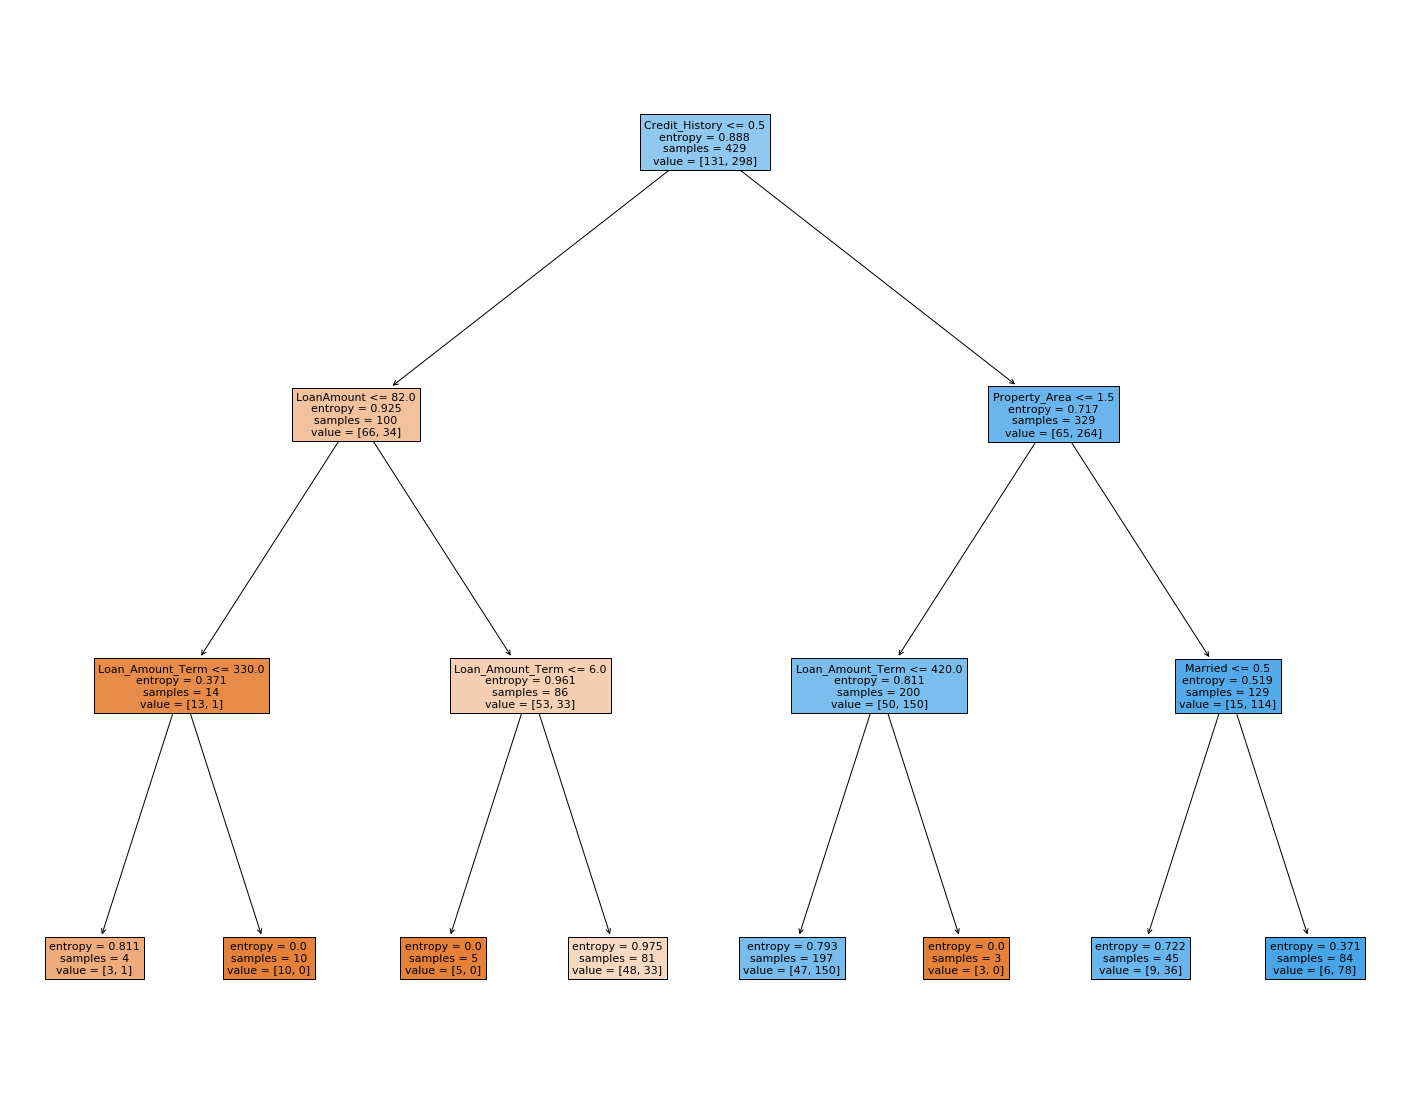

In [41]:

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(cl, 
                   feature_names=features,  
                   
                   filled=True)

<font color = light-gray> 
In this Decision tree I have added more of the parameters, in this DecisionTreeClassifier I have used the splitter parameter, in the previous examples the splitter default was Best, in this example I set it to random and as you can see in the accuracy below it increased.  
</font>

In [42]:
cl = DecisionTreeClassifier(splitter="random",criterion="entropy",max_depth=3)
cl = cl.fit(x_train,y_train)
y_pred = cl.predict(x_test)

In [43]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7675675675675676


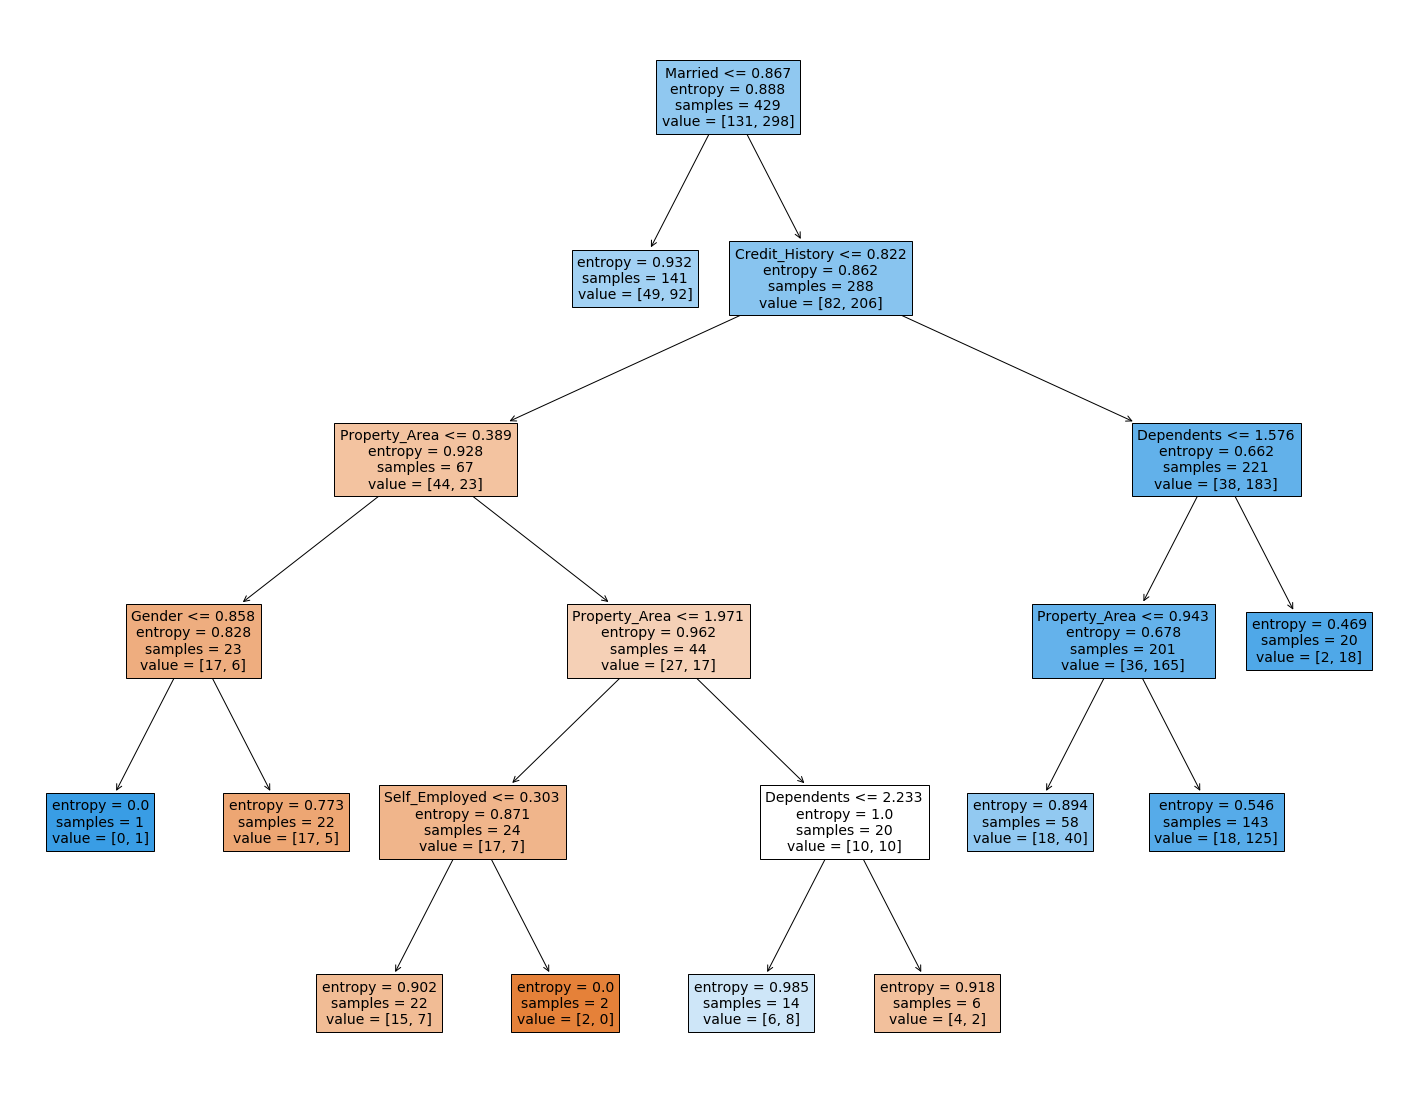

In [95]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(cl, 
                   feature_names=features,  
                   
                   filled=True)


<font color = light-gray> 
As you can see in the Decision Tree below I have tuned the DecisionTreeClassifier to the highest accuracy I could achieve. This was achieved using entropy as the criterion, the splitter is random, the depth is 3 and the fetures is 2.
</font>

In [108]:
cl = DecisionTreeClassifier(criterion='entropy',splitter='random', max_leaf_nodes=10,max_depth=3, max_features=2) 
cl = cl.fit(x_train,y_train)
y_pred = cl.predict(x_test)

In [109]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7783783783783784


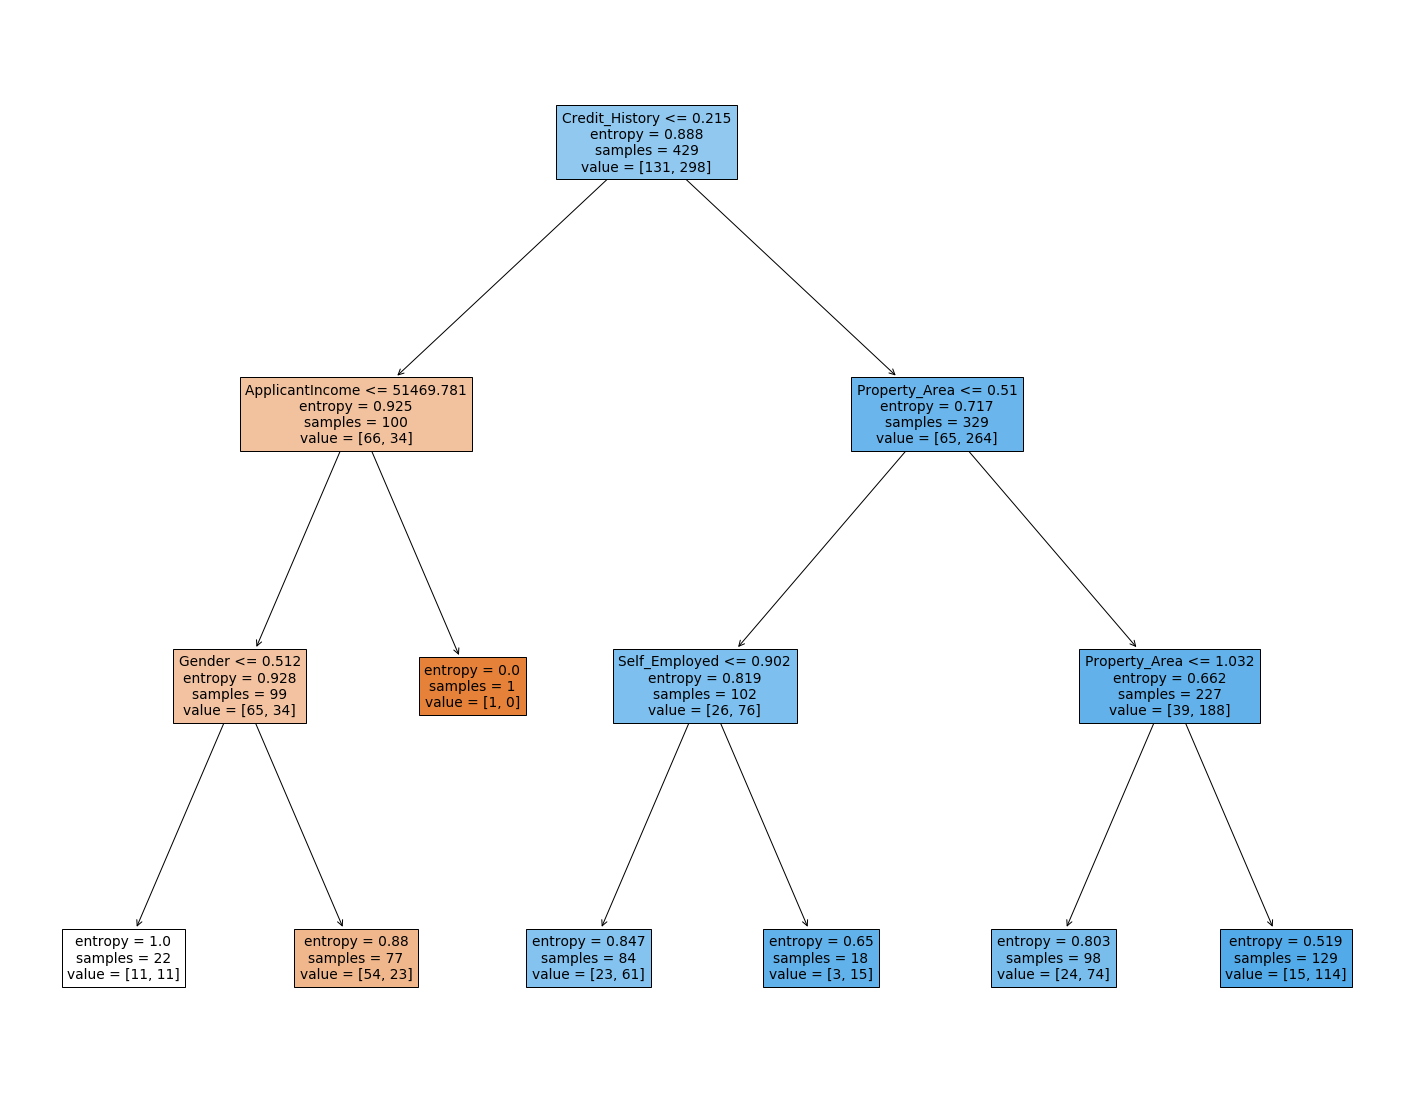

In [78]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(cl, 
                   feature_names=features,  
                   
                   filled=True)

### Conclusion <a class="anchor" id="Con"></a>

<font color = light-gray> 
In conclusion, The Decision tree algorithm is a very powerful and useful algorithm for binary decisions. The use of the CART algorithm displayed in the examples aboves shows the different paths you can take to tune the algoithm to find its best accuracy.
    
Its also very important to consider the data pre-processing that went into preparing the dataset to be used. This was a key and vital step.
</font>